<a href="https://colab.research.google.com/github/nopimhra/OECD-Countries-Analisys/blob/main/OECD_countries_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [ ]:
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRWRtWyT33ADQKGHfj1Jze9q4U33lnJ9Quo1OYVoJGwMezI97XGD-r0_s4GChz58Q/pub?gid=1270716604&single=true&output=csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16176 entries, 0 to 16175
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 16176 non-null  object 
 1   STRUCTURE_ID              16176 non-null  object 
 2   STRUCTURE_NAME            16176 non-null  object 
 3   ACTION                    16176 non-null  object 
 4   REF_AREA                  16176 non-null  object 
 5   Reference area            16176 non-null  object 
 6   FREQ                      16176 non-null  object 
 7   Frequency of observation  16176 non-null  object 
 8   MEASURE                   16176 non-null  object 
 9   Measure                   16176 non-null  object 
 10  UNIT_MEASURE              16176 non-null  object 
 11  Unit of measure           16176 non-null  object 
 12  ACTIVITY                  16176 non-null  object 
 13  Economic activity         16176 non-null  object 
 14  TIME_P

In [ ]:
#subset data dengan hanya mengambil kolom yang diperlukan
df_2 = df[['Reference area','Measure','Unit of measure','OBS_VALUE','Economic activity','TIME_PERIOD']]
df_2.head()

,Reference area,Measure,Unit of measure,OBS_VALUE,Economic activity,TIME_PERIOD
0,Mexico,"Production-based CO2 productivity, GDP per uni...",US dollars per unit of CO2,5.75,Total - all activities,2019
1,Mexico,"Production-based CO2 productivity, GDP per uni...",US dollars per unit of CO2,4.96,Total - all activities,2001
2,Mexico,"Production-based CO2 productivity, GDP per uni...",US dollars per unit of CO2,5.00,Total - all activities,2000
3,Mexico,"Production-based CO2 productivity, GDP per uni...",US dollars per unit of CO2,5.10,Total - all activities,1999
4,Mexico,"Production-based CO2 productivity, GDP per uni...",US dollars per unit of CO2,4.83,Total - all activities,1998


In [ ]:
def missing_check(df):
    missing=df.isnull().sum()
    per_mis = 100*(missing/len(df))
    data_type = df.dtypes
    number_unique = df.nunique()
    return pd.DataFrame({"Missing" : missing,
                         "Percent_Missing" : per_mis,
                         "Data_Types" : data_type,
                         "Number_Unique" : number_unique
                        })
missing_check(df_2)

,Missing,Percent_Missing,Data_Types,Number_Unique
Reference area,0,0.000000,object,37
Measure,0,0.000000,object,9
Unit of measure,0,0.000000,object,10
OBS_VALUE,1264,7.814045,float64,6847
Economic activity,0,0.000000,object,6
TIME_PERIOD,0,0.000000,int64,33


In [ ]:
# Menghitung distribusi data berdasarkan kolom REF_AREA (negara)
ref_area_distribution = df_2['Reference area'].value_counts()
ref_area_distribution.sort_values(ascending=True)

,count
Reference area,
Chile,381
Austria,381
Colombia,381
Norway,381
Italy,414
Canada,414
New Zealand,414
Finland,447
Switzerland,447


In [ ]:
#mengambil list negara dengan data measurement lengkap
full_value_countries = ref_area_distribution[ref_area_distribution == 447].index
countries_list = full_value_countries.to_list()
len(countries_list)

30

In [ ]:
#subset data dengan hanya menngambil data dari negara yang memiliki mesurement yang lengkap
df_2 = df_2[df_2['Reference area'].isin(countries_list)]
df_2.to_csv('raw data.csv', index=False)
df_2

,Reference area,Measure,Unit of measure,OBS_VALUE,Economic activity,TIME_PERIOD
0,Mexico,"Production-based CO2 productivity, GDP per uni...",US dollars per unit of CO2,5.75,Total - all activities,2019
1,Mexico,"Production-based CO2 productivity, GDP per uni...",US dollars per unit of CO2,4.96,Total - all activities,2001
2,Mexico,"Production-based CO2 productivity, GDP per uni...",US dollars per unit of CO2,5.00,Total - all activities,2000
3,Mexico,"Production-based CO2 productivity, GDP per uni...",US dollars per unit of CO2,5.10,Total - all activities,1999
4,Mexico,"Production-based CO2 productivity, GDP per uni...",US dollars per unit of CO2,4.83,Total - all activities,1998
...,...,...,...,...,...,...
16171,Greece,"Water stress, total freshwater abstraction",Percentage of internal renewable resources,16.69,Total - all activities,2015
16172,Netherlands,Energy consumption,Percentage of energy consumption,24.05,Industry (except construction),2018
16173,Lithuania,Energy consumption,Percentage of energy consumption,9.77,Services,2015
16174,Luxembourg,Real GDP per capita,"US dollars per person, PPP converted",107859.50,Total - all activities,2015


In [ ]:
#ubah tipe data kolom obs value ke numerik dan time_period ke datetime
df_2['OBS_VALUE'] = pd.to_numeric(df_2['OBS_VALUE'], errors='coerce')
df_2['TIME_PERIOD'] = pd.to_datetime(df_2['TIME_PERIOD'], format='%Y')
df_2 = df_2[~((df_2['Economic activity'] != 'Industry (except construction)') & (df_2['Measure'] == 'Energy consumption'))]

<ipython-input-14-90fd8b50443e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['OBS_VALUE'] = pd.to_numeric(df_2['OBS_VALUE'], errors='coerce')


In [ ]:
#pivot data dan mengisi missing value dengan mean
new_df = pd.DataFrame()
for country in countries_list:
  df_4 = df_2[df_2['Reference area'] == country]
  data_2 = df_4.pivot_table(index=['Reference area', 'TIME_PERIOD'], columns=['Measure'], values='OBS_VALUE') # Use pivot_table and specify an aggregation function like 'mean'
  data_2.reset_index(inplace=True)
  for col in data_2.columns:
    if data_2[col].isnull().any():
      data_2[col] = data_2[col].fillna(data_2[col].mean())
  new_df= pd.concat([new_df, data_2])

new_df.to_csv('data.csv', index=False)
new_df.head()

Measure,Reference area,TIME_PERIOD,Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",Municipal waste recycled or composted,Population exposure to PM2.5,"Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Real GDP per capita,Renewable electricity generation,"Water stress, total freshwater abstraction"
0,Mexico,1990-01-01,30.91,1.47,9454.08,2.867273,30.95000,5.073929,13893.01,24.69,18.791296
1,Mexico,1991-01-01,29.93,1.51,9374.40,0.680000,21.47913,5.073929,14196.70,22.39,18.791296
2,Mexico,1992-01-01,29.45,1.50,9594.65,2.360000,21.47913,5.073929,14389.07,25.66,18.791296
3,Mexico,1993-01-01,28.59,1.50,10539.11,2.360000,21.47913,5.073929,15792.84,25.40,18.791296
4,Mexico,1994-01-01,27.85,1.51,10760.01,2.360000,21.47913,5.073929,16210.95,19.02,17.300000


# EDA

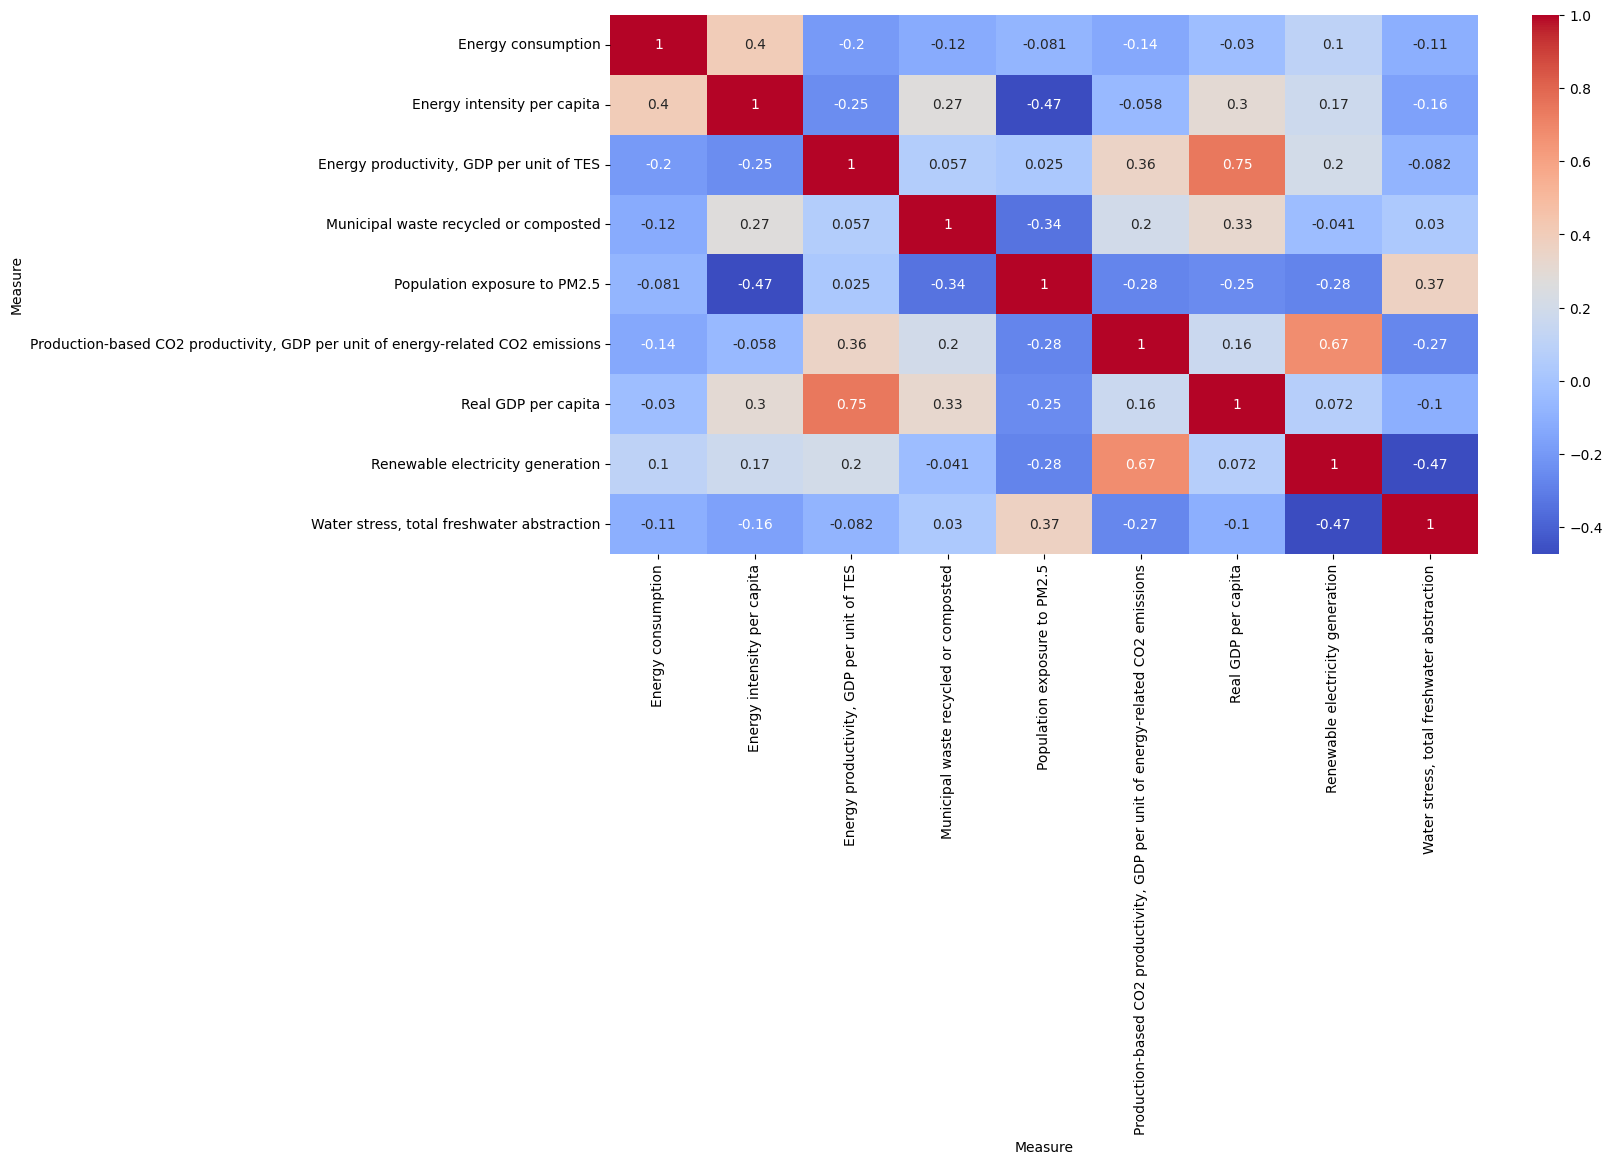

In [ ]:
#cek korelasi antar fitur menggunakan heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Drop refrense_area dan Time Periode
df_visualization = new_df.drop(['Reference area', 'TIME_PERIOD'], axis=1)

# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Buat Heatmap untuk menampilkan corelasi tiap colom
sns.heatmap(df_visualization.corr(), annot=True, cmap='coolwarm')

# Tampilkan Plot
plt.show()

In [ ]:
#get mean for each measure grouped by country
df_clustering = new_df.groupby(['Reference area']).mean().reset_index()
df_clustering.fillna(0, inplace=True)
df_clustering.describe()

Measure,TIME_PERIOD,Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",Municipal waste recycled or composted,Population exposure to PM2.5,"Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Real GDP per capita,Renewable electricity generation,"Water stress, total freshwater abstraction"
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2005-12-31 21:05:27.272727040,26.205030,3.988364,10655.615353,28.458698,14.977261,5.568190,37506.171383,26.859286,15.487528
min,2005-12-31 21:05:27.272727296,18.420606,0.862121,3369.168485,2.867273,6.820435,2.439643,14519.975455,2.397879,0.095000
25%,2005-12-31 21:05:27.272727296,20.347121,2.612879,7989.751970,18.604828,11.382065,4.180804,27743.345909,11.685227,4.044470
50%,2005-12-31 21:05:27.272727296,25.210303,3.343939,10077.378182,26.919258,13.595870,5.118214,38188.490758,17.176970,13.489438
75%,2005-12-31 21:05:27.272727296,29.740076,4.476364,12968.641439,40.655391,19.479674,6.305446,43170.642424,32.473788,21.307614
max,2005-12-31 21:05:27.272727296,42.868485,13.255455,18723.022424,63.823529,24.919565,12.247857,98064.581818,99.946061,54.106875
std,NaN,6.220170,2.383374,3844.094563,14.614879,5.332377,2.356915,16289.830915,24.678587,14.362358


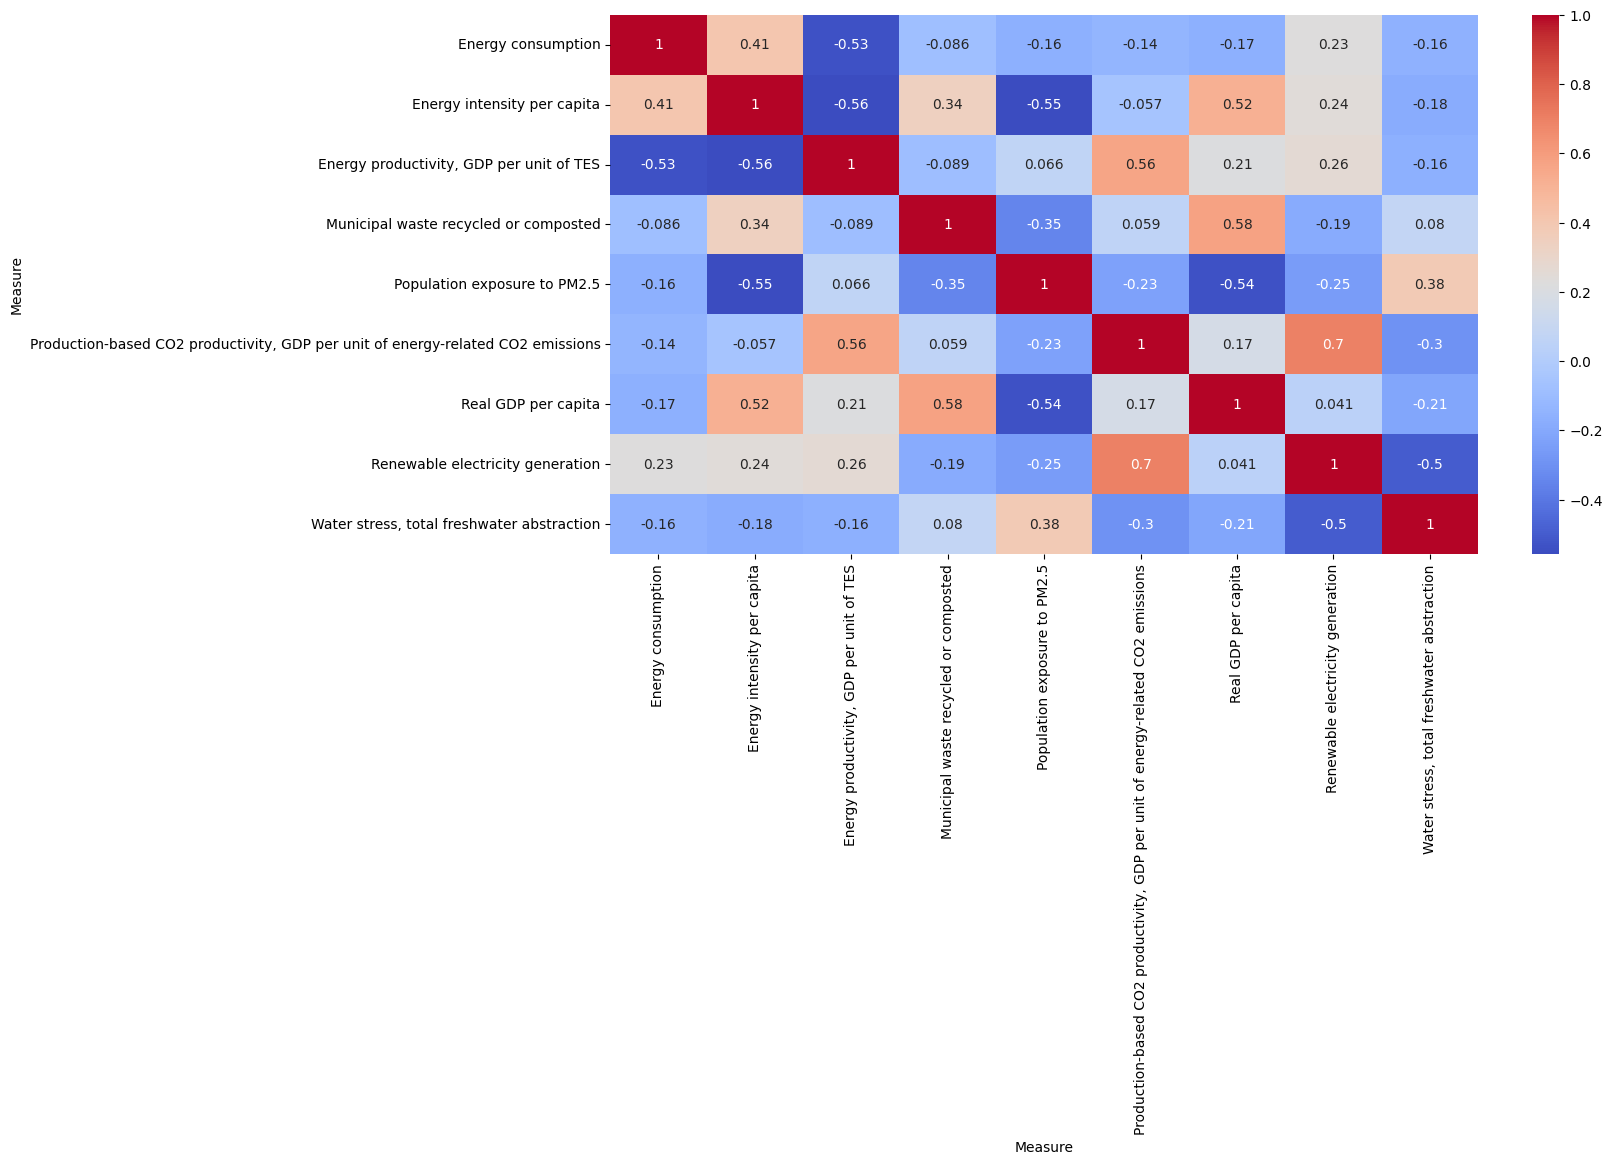

In [ ]:
#cek korelasi antar fitur menggunakan heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Drop refrense_area dan Time Periode
df_visualization = df_clustering.drop(['Reference area', 'TIME_PERIOD'], axis=1)

# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Buat Heatmap untuk menampilkan corelasi tiap colom
sns.heatmap(df_visualization.corr(), annot=True, cmap='coolwarm')

# Tampilkan Plot
plt.show()

# FEATURE ENGINEERING

In [ ]:
df_feature = df_clustering.copy()
df_feature.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                                                                           Non-Null Count  Dtype         
---  ------                                                                           --------------  -----         
 0   Reference area                                                                   30 non-null     object        
 1   TIME_PERIOD                                                                      30 non-null     datetime64[ns]
 2   Energy consumption                                                               30 non-null     float64       
 3   Energy intensity per capita                                                      30 non-null     float64       
 4   Energy productivity, GDP per unit of TES                                         30 non-null     float64       
 5   Municipal waste recycled or composted                                    

In [ ]:
#covert to category
data1 = df_feature.select_dtypes(exclude='object')
data2 = df_feature.select_dtypes(include='object').apply(lambda x: x.astype('category'))

#concat data
df_feature = pd.concat([data1,data2], axis =1)

In [ ]:
df_feature.dtypes

,0
Measure,
TIME_PERIOD,datetime64[ns]
Energy consumption,float64
Energy intensity per capita,float64
"Energy productivity, GDP per unit of TES",float64
Municipal waste recycled or composted,float64
Population exposure to PM2.5,float64
"Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",float64
Real GDP per capita,float64
Renewable electricity generation,float64


In [ ]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                                                                           Non-Null Count  Dtype         
---  ------                                                                           --------------  -----         
 0   TIME_PERIOD                                                                      30 non-null     datetime64[ns]
 1   Energy consumption                                                               30 non-null     float64       
 2   Energy intensity per capita                                                      30 non-null     float64       
 3   Energy productivity, GDP per unit of TES                                         30 non-null     float64       
 4   Municipal waste recycled or composted                                            30 non-null     float64       
 5   Population exposure to PM2.5                                             

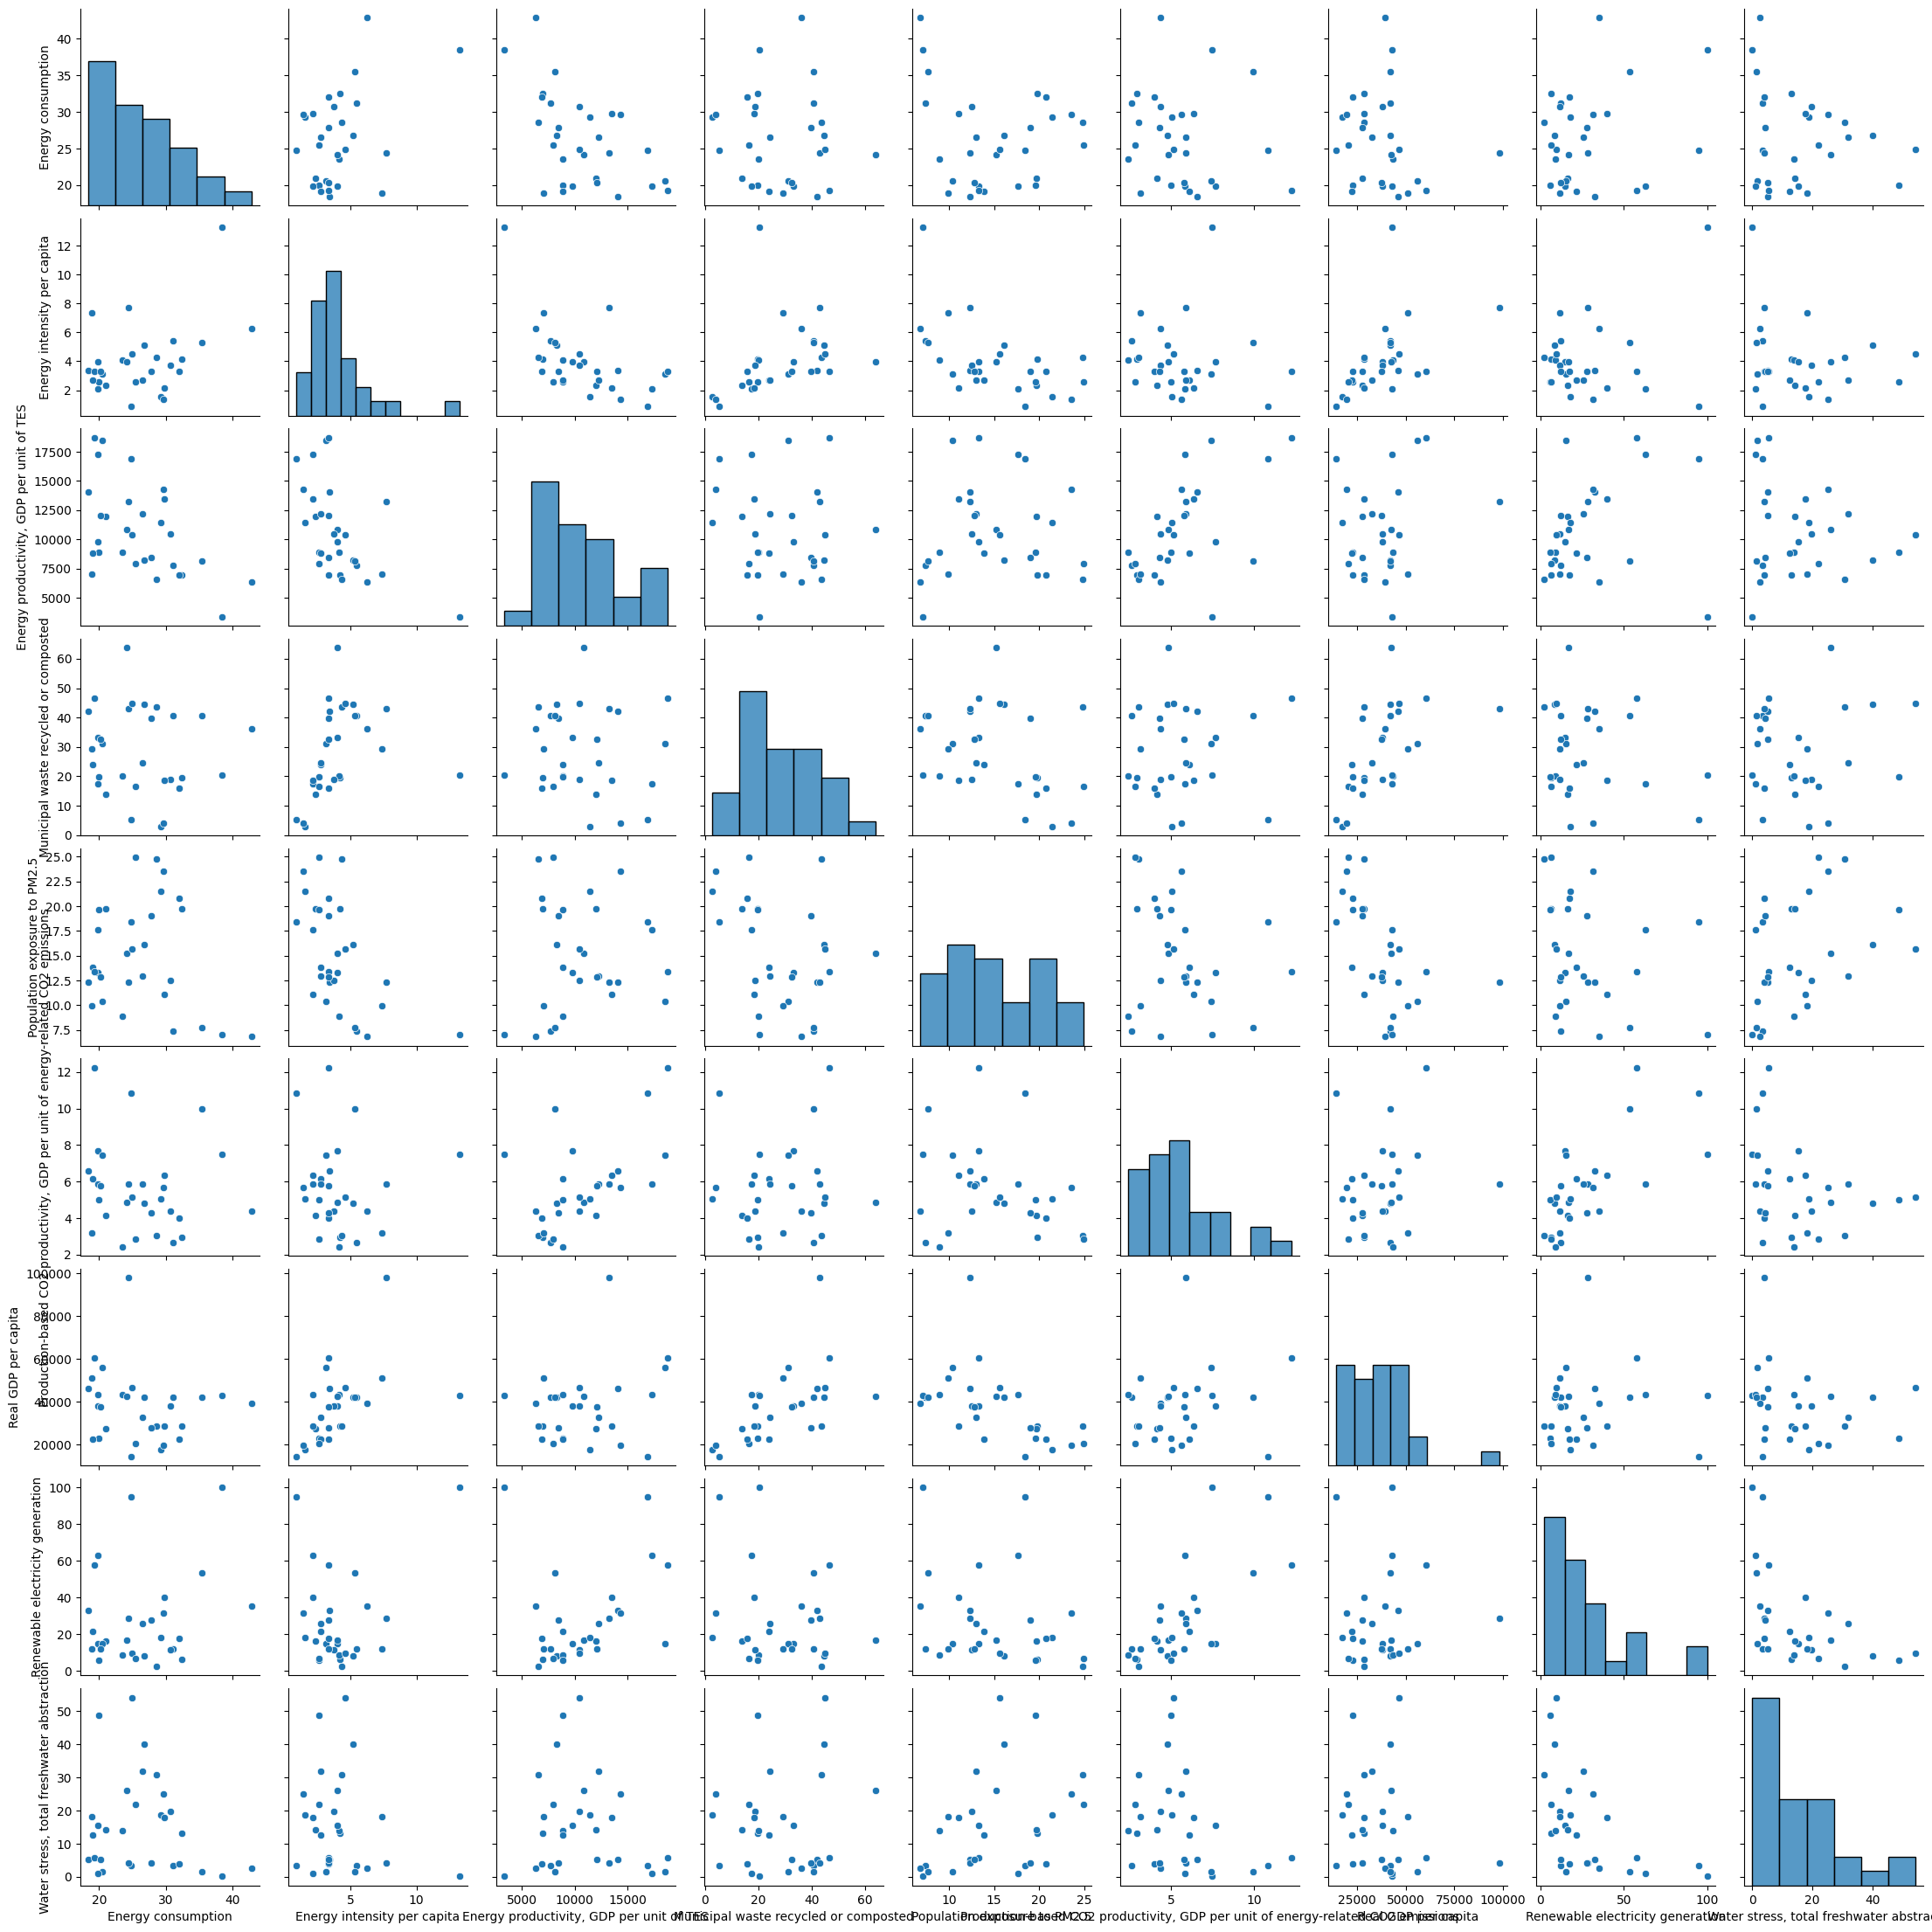

In [ ]:
sns.pairplot(df_feature)

In [ ]:
df_check = df_feature.copy()
df_check = df_check.select_dtypes(include='float64')
finalFeatures =df_check.columns.tolist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
for col in finalFeatures:
  Q1 = df_check[col].quantile(0.25)
  Q3 = df_check[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_check[col] = np.clip(df_check[col], lower_bound, upper_bound)
  #normalisasi dengan minmaxscaller
  df_check[col] = scaler.fit_transform(df_check[[col]])


In [ ]:
df_clustering = pd.concat([df_clustering.select_dtypes(exclude='float64'), df_check], axis=1)
df_clustering.head()

Measure,Reference area,TIME_PERIOD,Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",Municipal waste recycled or composted,Population exposure to PM2.5,"Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Real GDP per capita,Renewable electricity generation,"Water stress, total freshwater abstraction"
0,Australia,2005-12-31 21:05:27.272727296,0.520687,0.712015,0.285488,0.619954,0.029091,0.030535,0.531168,0.157138,0.070986
1,Belgium,2005-12-31 21:05:27.272727296,0.343786,0.668708,0.317872,0.684042,0.512420,0.335886,0.532016,0.096214,0.846737
2,Costa Rica,2005-12-31 21:05:27.272727296,0.260406,0.000000,0.880765,0.040689,0.640026,1.000000,0.000000,1.000000,0.072433
3,Czechia,2005-12-31 21:05:27.272727296,0.574122,0.514721,0.233624,0.274914,0.715240,0.071958,0.275054,0.064119,0.277334
4,Denmark,2005-12-31 21:05:27.272727296,0.000000,0.390001,0.698102,0.641652,0.304218,0.586750,0.610919,0.495281,0.108546


# CLUSTERING

In [ ]:
# drop Time_Period
df_clustering.drop('TIME_PERIOD', axis=1, inplace=True)

In [ ]:
X = df_clustering.drop(['Reference area'], axis=1)
y = df_clustering['Reference area']
X.head()

Measure,Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",Municipal waste recycled or composted,Population exposure to PM2.5,"Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Real GDP per capita,Renewable electricity generation,"Water stress, total freshwater abstraction"
0,0.520687,0.712015,0.285488,0.619954,0.029091,0.030535,0.531168,0.157138,0.070986
1,0.343786,0.668708,0.317872,0.684042,0.512420,0.335886,0.532016,0.096214,0.846737
2,0.260406,0.000000,0.880765,0.040689,0.640026,1.000000,0.000000,1.000000,0.072433
3,0.574122,0.514721,0.233624,0.274914,0.715240,0.071958,0.275054,0.064119,0.277334
4,0.000000,0.390001,0.698102,0.641652,0.304218,0.586750,0.610919,0.495281,0.108546


In [ ]:
# Mengambil Nilai X yang belum dilakukan normalisasi
X_unnormalized = new_df.groupby(['Reference area']).mean().reset_index()
X_unnormalized = X_unnormalized.drop(['Reference area','TIME_PERIOD'], axis=1)
X_unnormalized.head()

Measure,Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",Municipal waste recycled or composted,Population exposure to PM2.5,"Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Real GDP per capita,Renewable electricity generation,"Water stress, total freshwater abstraction"
0,31.150303,5.425758,7752.506970,40.657333,7.346957,2.655000,42030.032121,12.023939,3.438947
1,26.825455,5.148182,8249.724545,44.563939,16.094783,4.808571,42073.943333,8.291818,39.982500
2,24.786970,0.862121,16892.306061,5.347500,18.404348,10.863929,14519.975455,94.790909,3.507143
3,32.456667,4.161212,6956.201515,19.625000,19.765652,2.947143,28765.474848,6.325758,13.159483
4,18.420606,3.361818,14087.730303,41.980000,12.326522,6.577857,46160.435758,32.738182,5.208333


In [ ]:
# change
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

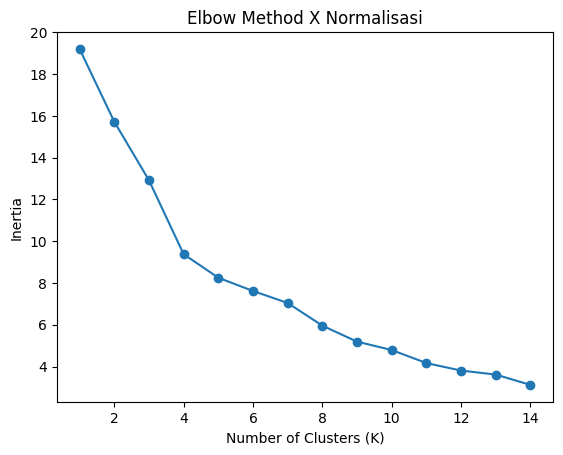

In [ ]:
#cek jumlah cluster dengan elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method X Normalisasi')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

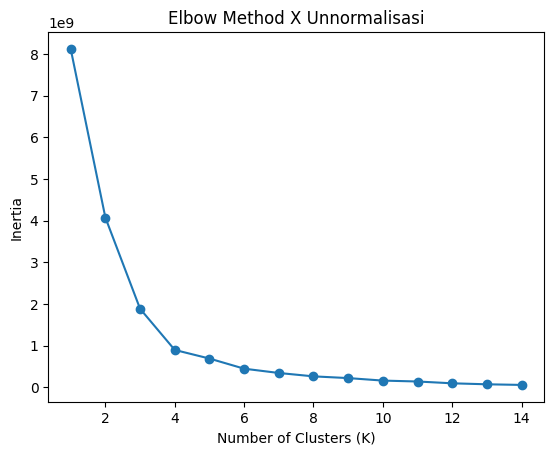

In [ ]:
#cek jumlah cluster dengan elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_unnormalized)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method X Unnormalisasi')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# model fittinf denga n_cluster = 3 K - Means Clustering Dengan X Normalisasi
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 15, random_state = 42)
kmeans.fit(X)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

In [ ]:
# model fittinf denga n_cluster = 3 K - Means Clustering Dengan X Unnormalisasi
kmeans_unnormalized = KMeans(n_clusters = 3, init = 'k-means++', n_init = 15, random_state = 42)
kmeans_unnormalized.fit(X_unnormalized)
labels1_unnormalized = kmeans_unnormalized.labels_
centroids1_unnormalized = kmeans_unnormalized.cluster_centers_

In [ ]:
pd.DataFrame(centroids1)

,0,1,2,3,4,5,6,7,8
0,0.550970,0.874020,0.277952,0.528131,0.093911,0.436107,0.633933,0.518320,0.104734
1,0.087826,0.262263,0.894015,0.420080,0.419785,0.755980,0.569937,0.718753,0.070406
2,0.305648,0.371694,0.426276,0.385568,0.571466,0.329477,0.318329,0.219740,0.454962


In [ ]:
pd.DataFrame(centroids1_unnormalized)

,0,1,2,3,4,5,6,7,8
0,25.949527,4.882860,10735.329413,35.152924,11.688043,5.929062,44513.303258,28.931824,13.365448
1,26.654848,2.600373,10360.089345,19.106258,19.232074,5.099423,24223.669811,24.179161,18.973104
2,24.445455,7.720303,13222.028485,42.932800,12.292174,5.888214,98064.581818,28.540303,4.128333


Text(0.5, 1.0, 'Country Clusters 2')

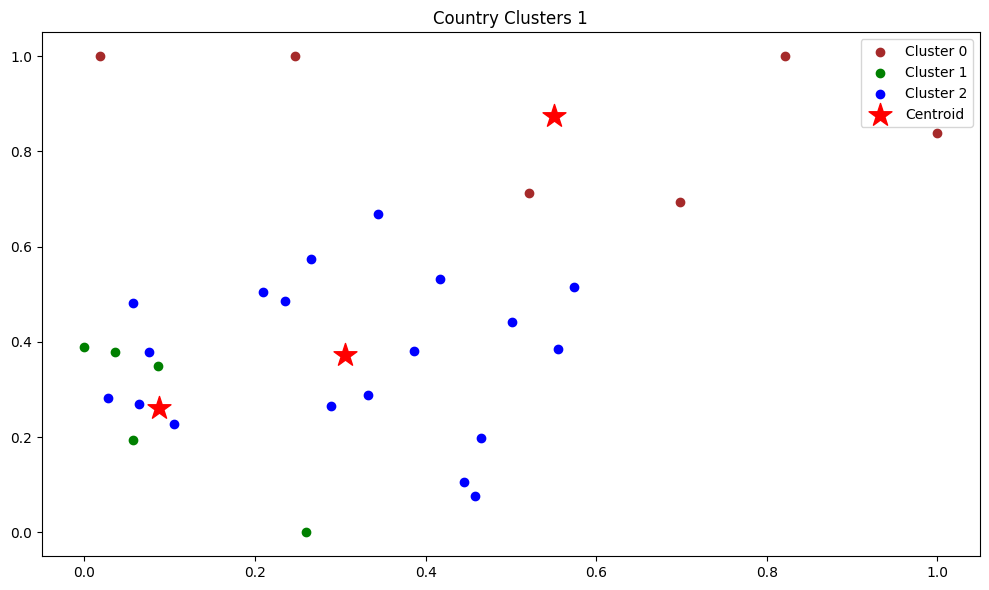

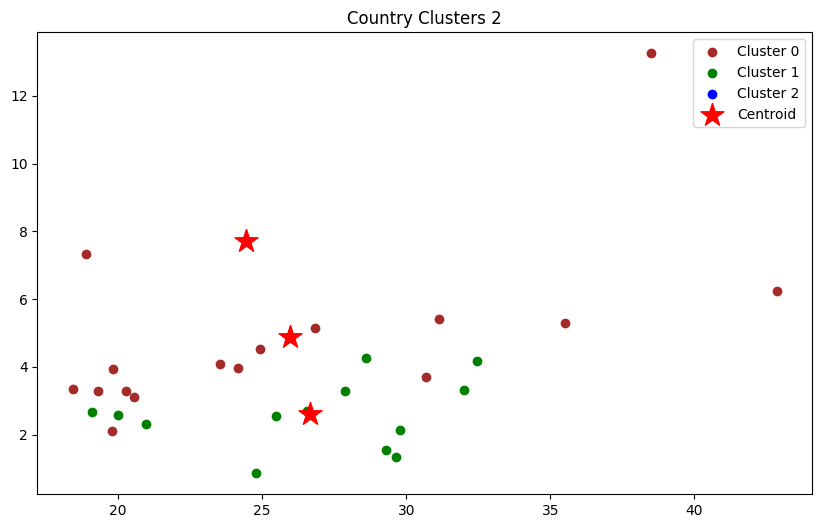

In [ ]:
# Memvisualisasikan Hasil Clustering
X = pd.DataFrame(X)
X_unnormalized = pd.DataFrame(X_unnormalized)

plt.figure(figsize=(10,6))
plt.scatter(X.iloc[labels1 == 0, 0], X.iloc[labels1 == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X.iloc[labels1 == 1, 0], X.iloc[labels1 == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X.iloc[labels1 == 2, 0], X.iloc[labels1 == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')
plt.legend()
plt.title('Country Clusters 1')

# beri jarak tiap plot
plt.tight_layout()

plt.figure(figsize=(10,6))
plt.scatter(X_unnormalized.iloc[labels1_unnormalized == 0, 0], X_unnormalized.iloc[labels1_unnormalized == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X_unnormalized.iloc[labels1_unnormalized == 1, 0], X_unnormalized.iloc[labels1_unnormalized == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X_unnormalized.iloc[labels1_unnormalized == 2, 0], X_unnormalized.iloc[labels1_unnormalized == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans_unnormalized.cluster_centers_[:,0], kmeans_unnormalized.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')
plt.legend()
plt.title('Country Clusters 2')



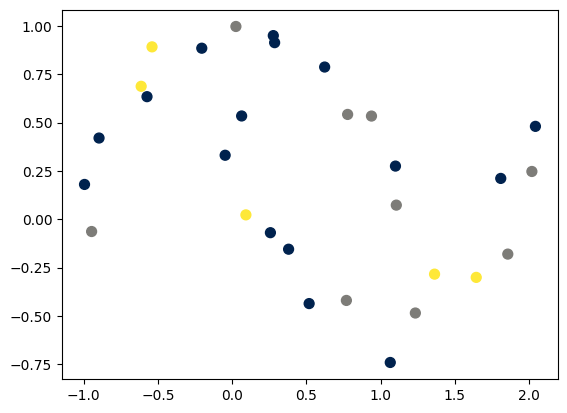

In [ ]:
from sklearn.datasets import make_moons
X3, y3 = make_moons(30, noise=.075, random_state=22)

labels = KMeans(3, random_state=0).fit_predict(X)
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=50, cmap='cividis')

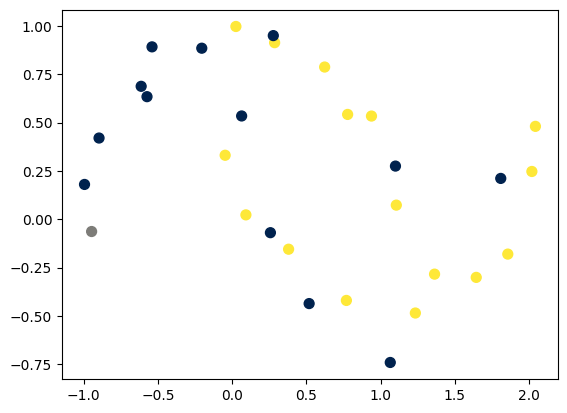

In [ ]:
labels_unnormalized = KMeans(3, random_state=0).fit_predict(X_unnormalized)
plt.scatter(X3[:, 0], X3[:, 1], c=labels_unnormalized, s=50, cmap='cividis')

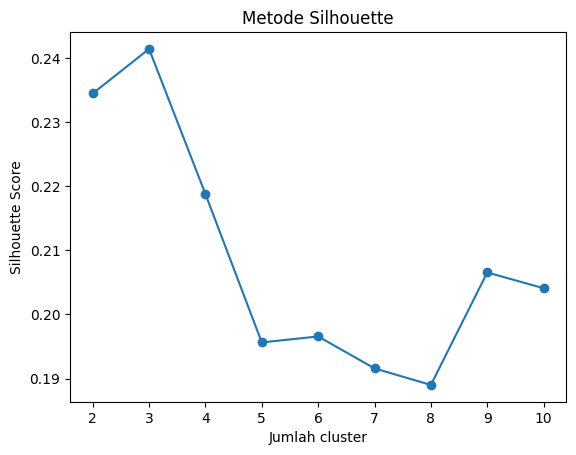

In [ ]:
#cek jumlah cluster dengan silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):  # Dimulai dari 2 karena silhouette tidak didefinisikan untuk k=1
  kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
  labels = kmeans.fit_predict(X)
  score = silhouette_score(X, labels)
  silhouette_scores.append(score)


plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah cluster')
plt.ylabel('Silhouette Score')
plt.title('Metode Silhouette')
plt.show()

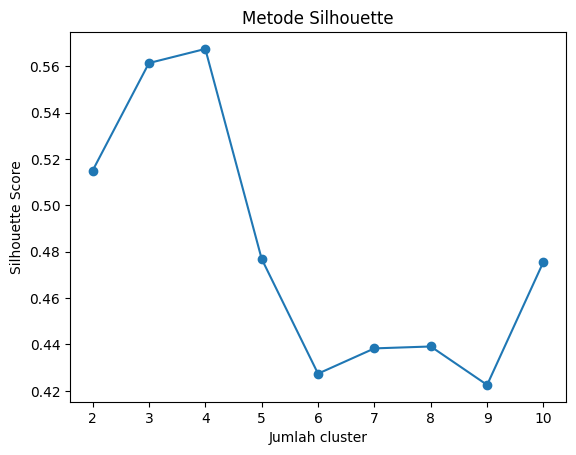

In [ ]:
#cek jumlah cluster dengan silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):  # Dimulai dari 2 karena silhouette tidak didefinisikan untuk k=1
  kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
  labels = kmeans.fit_predict(X_unnormalized)
  score = silhouette_score(X_unnormalized, labels)
  silhouette_scores.append(score)


plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah cluster')
plt.ylabel('Silhouette Score')
plt.title('Metode Silhouette')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels1)
print(f'Silhouette Score: {silhouette_avg}')

silhouette_avg_unnormalized = silhouette_score(X_unnormalized, labels1_unnormalized)
print(f'Silhouette Score: {silhouette_avg_unnormalized}')

Silhouette Score: 0.24139547008373027
Silhouette Score: 0.5614348665590843


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(X, labels1)
dbi_unnormalized = davies_bouldin_score(X_unnormalized, labels1_unnormalized)
print(f'Davies-Bouldin Index: {dbi}')
print(f'Davies-Bouldin Index: {dbi_unnormalized}')

Davies-Bouldin Index: 1.293711542507496
Davies-Bouldin Index: 0.42359945712250924


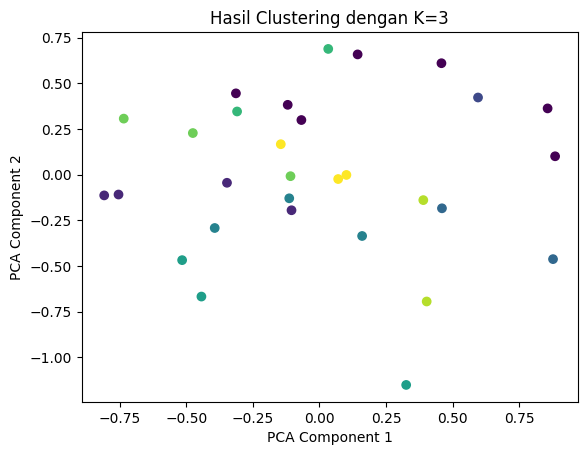

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
data_2d = pca.fit_transform(df_clustering.drop(['Reference area'], axis=1))

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
plt.title('Hasil Clustering dengan K=3')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
df_clustering.to_csv('clustering.csv', index=False)

# Hierical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)
clustering

AgglomerativeClustering()

In [ ]:
clustering_unnormalized = AgglomerativeClustering().fit(X_unnormalized)
clustering_unnormalized

AgglomerativeClustering()

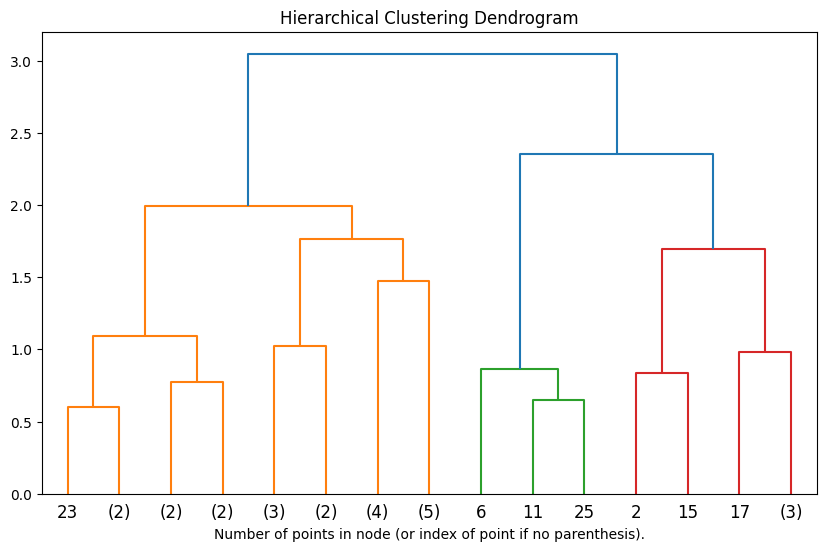

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.figure(100, figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

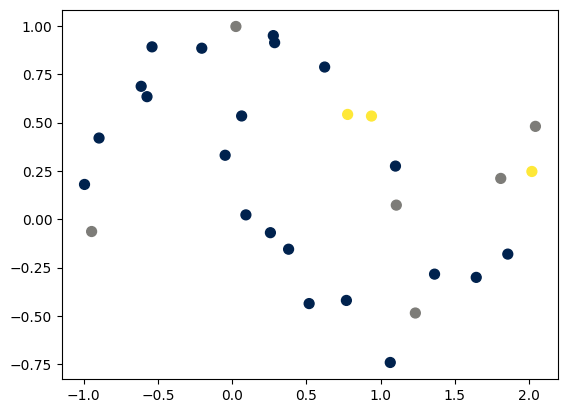

In [ ]:
from sklearn.datasets import make_moons
X3, y3 = make_moons(30, noise=.075, random_state=22)

single = AgglomerativeClustering(n_clusters=3)

labels = single.fit_predict(X)
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=50, cmap='cividis')

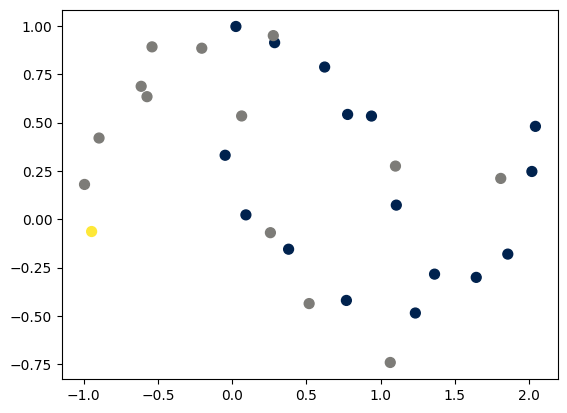

In [ ]:
X3, y3 = make_moons(30, noise=.075, random_state=22)
single = AgglomerativeClustering(n_clusters=3)

labels_unnormalized = single.fit_predict(X_unnormalized)
plt.scatter(X3[:, 0], X3[:, 1], c=labels_unnormalized, s=50, cmap='cividis')

In [ ]:
# Check Shihoulete score hierical clustering
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
silhouette_avg_unnormalized = silhouette_score(X_unnormalized, labels_unnormalized)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Silhouette Score: {silhouette_avg_unnormalized}')

Silhouette Score: 0.2697693372070754
Silhouette Score: 0.5614348665590843


# Fix Model Clustering

In [ ]:
# K Means Clustering dengan jumlah cluster 3
# model fittinf dengan cluster = 3 K - Means Clustering Dengan X Unnormalisasi
kmeans_unnormalized = KMeans(n_clusters = 3, init = 'k-means++', n_init = 15, random_state = 42)
kmeans_unnormalized.fit(X_unnormalized)
labels1_unnormalized = kmeans_unnormalized.labels_
centroids1_unnormalized = kmeans_unnormalized.cluster_centers_


In [ ]:
# gabungkan hasil cluster
df_clustering_final = new_df.groupby(['Reference area']).mean().reset_index()
df_clustering_final['Cluster'] = labels1_unnormalized
df_clustering_final

Measure,Reference area,TIME_PERIOD,Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",Municipal waste recycled or composted,Population exposure to PM2.5,"Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Real GDP per capita,Renewable electricity generation,"Water stress, total freshwater abstraction",Cluster
0,Australia,2005-12-31 21:05:27.272727296,31.150303,5.425758,7752.506970,40.657333,7.346957,2.655000,42030.032121,12.023939,3.438947,0
1,Belgium,2005-12-31 21:05:27.272727296,26.825455,5.148182,8249.724545,44.563939,16.094783,4.808571,42073.943333,8.291818,39.982500,0
2,Costa Rica,2005-12-31 21:05:27.272727296,24.786970,0.862121,16892.306061,5.347500,18.404348,10.863929,14519.975455,94.790909,3.507143,1
3,Czechia,2005-12-31 21:05:27.272727296,32.456667,4.161212,6956.201515,19.625000,19.765652,2.947143,28765.474848,6.325758,13.159483,1
4,Denmark,2005-12-31 21:05:27.272727296,18.420606,3.361818,14087.730303,41.980000,12.326522,6.577857,46160.435758,32.738182,5.208333,0
5,Estonia,2005-12-31 21:05:27.272727296,23.538788,4.100000,8859.440000,20.141786,8.917826,2.439643,43332.535758,8.761613,13.819394,0
6,Finland,2005-12-31 21:05:27.272727296,42.868485,6.237879,6305.761818,36.269048,6.820435,4.395357,39338.284242,35.374848,2.702500,0
7,France,2005-12-31 21:05:27.272727296,19.812121,3.951515,9759.331515,33.185000,13.256087,7.669643,38201.508485,14.896970,15.415400,0
8,Germany,2005-12-31 21:05:27.272727296,24.165455,3.971818,10844.831818,63.823529,15.251304,4.837143,42545.186667,16.730000,26.137500,0
9,Greece,2005-12-31 21:05:27.272727296,20.975455,2.320000,11963.428788,13.904400,19.734783,4.143929,27698.917273,16.184242,14.317407,1


# Time Series Forcasting

In [ ]:
!pip install pmdarima --q # for auto arima
!pip install prophet --q # for fbprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8); # setting the figuresize

from datetime import datetime, date #Library to deal with datetime columns

# time series analysis libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# time series forecasting libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# model evaluation libraries
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error


#for saving trained model
import pickle

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

In [ ]:
data = new_df.copy()
data.shape

(990, 11)

In [ ]:
data

Measure,Reference area,TIME_PERIOD,Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",Municipal waste recycled or composted,Population exposure to PM2.5,"Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Real GDP per capita,Renewable electricity generation,"Water stress, total freshwater abstraction"
0,Mexico,1990-01-01,30.91,1.47,9454.08,2.867273,30.950000,5.073929,13893.01,24.69,18.791296
1,Mexico,1991-01-01,29.93,1.51,9374.40,0.680000,21.479130,5.073929,14196.70,22.39,18.791296
2,Mexico,1992-01-01,29.45,1.50,9594.65,2.360000,21.479130,5.073929,14389.07,25.66,18.791296
3,Mexico,1993-01-01,28.59,1.50,10539.11,2.360000,21.479130,5.073929,15792.84,25.40,18.791296
4,Mexico,1994-01-01,27.85,1.51,10760.01,2.360000,21.479130,5.073929,16210.95,19.02,17.300000
...,...,...,...,...,...,...,...,...,...,...,...
28,Finland,2018-01-01,42.99,6.17,7348.02,42.280000,5.520000,5.700000,45303.83,45.74,2.702500
29,Finland,2019-01-01,43.11,6.02,7603.40,43.460000,5.400000,6.220000,45807.79,46.44,2.702500
30,Finland,2020-01-01,42.68,5.74,7782.51,42.110000,4.920000,6.860000,44664.40,51.87,2.702500
31,Finland,2021-01-01,42.60,5.99,7646.79,38.980000,6.820435,7.070000,45837.09,52.93,2.702500


In [ ]:
# Dapatkan refrence area bedasarkan clusternya
area_cluster_1 = df_clustering_final[df_clustering_final['Cluster'] == 0]['Reference area'].tolist()
area_cluster_2 = df_clustering_final[df_clustering_final['Cluster'] == 1]['Reference area'].tolist()
area_cluster_3 = df_clustering_final[df_clustering_final['Cluster'] == 2]['Reference area'].tolist()

In [ ]:
# Subset dataset dari area cluster
cluster_1_energy = data[(data['Reference area'].isin(area_cluster_1))]
cluster_2_energy = data[(data['Reference area'].isin(area_cluster_2))]
cluster_3_energy = data[(data['Reference area'].isin(area_cluster_3))]

In [ ]:
# Pilih Column 'Reference area', 'TIME_PERIOD' , Energy intensity per capita dan buat rata-rata nya

cluster_1_energy = cluster_1_energy[['Reference area', 'TIME_PERIOD', 'Energy intensity per capita']]
cluster_2_energy = cluster_2_energy[['Reference area', 'TIME_PERIOD', 'Energy intensity per capita']]
cluster_3_energy = cluster_3_energy[['Reference area', 'TIME_PERIOD', 'Energy intensity per capita']]

In [ ]:
# Pivot dan rata-rata tiap  Energy intensity per capita bedasarkan time_periode
cluster_1_energy_pv = cluster_1_energy.pivot_table(index=['TIME_PERIOD'], columns='Reference area', values='Energy intensity per capita').reset_index()
cluster_1_energy_pv.columns.name = None

cluster_2_energy_pv = cluster_2_energy.pivot_table(index=['TIME_PERIOD'], columns='Reference area', values='Energy intensity per capita').reset_index()
cluster_2_energy_pv.columns.name = None

cluster_3_energy_pv = cluster_3_energy.pivot_table(index=['TIME_PERIOD'], columns='Reference area', values='Energy intensity per capita').reset_index()
cluster_3_energy_pv.columns.name = None

In [ ]:
cluster_3_energy_pv

,TIME_PERIOD,Luxembourg
0,1990-01-01,8.87
1,1991-01-01,9.35
2,1992-01-01,9.26
3,1993-01-01,9.27
4,1994-01-01,8.82
5,1995-01-01,7.71
6,1996-01-01,7.71
7,1997-01-01,7.41
8,1998-01-01,7.07
9,1999-01-01,7.27


In [ ]:
cluster_1_energy_pv['Avg Cluster1'] = cluster_1_energy_pv.iloc[:,1:].mean(axis=1).round(2)
cluster_2_energy_pv['Avg Cluster2'] = cluster_2_energy_pv.iloc[:,1:].mean(axis=1).round(2)
cluster_3_energy_pv['Avg Cluster3'] = cluster_3_energy_pv.iloc[:,1:].mean(axis=1).round(2)

In [ ]:
data_energy = pd.concat([cluster_1_energy_pv[['TIME_PERIOD', 'Avg Cluster1']], cluster_2_energy_pv[['Avg Cluster2']], cluster_3_energy_pv[['Avg Cluster3']]], axis=1)
data = data_energy.copy()
data

,TIME_PERIOD,Avg Cluster1,Avg Cluster2,Avg Cluster3
0,1990-01-01,4.84,2.51,8.87
1,1991-01-01,4.79,2.47,9.35
2,1992-01-01,4.55,2.33,9.26
3,1993-01-01,4.55,2.31,9.27
4,1994-01-01,4.65,2.29,8.82
5,1995-01-01,4.64,2.38,7.71
6,1996-01-01,4.86,2.46,7.71
7,1997-01-01,4.81,2.50,7.41
8,1998-01-01,4.85,2.48,7.07
9,1999-01-01,4.88,2.47,7.27


In [ ]:
data.rename(columns={'TIME_PERIOD':'Year'},inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Year'] = pd.to_datetime(data['Year'])
data.set_index('Year', inplace=True)

In [ ]:
# Menghitung jumlah tahun dalam rentang data
total_years = (data.index.max().year - data.index.min().year + 1)


# Menghitung jumlah tahun unik dalam data
unique_years = data.index.nunique()  # Gunakan .nunique() pada index langsung


if unique_years == total_years:
    print('Data Is Continuous')
    data.index.freq = 'YS'  # setting the data frequency to year
else:
    print('Data Is Not Continuous')

Data Is Continuous


**TIME SERIES ANALYSIS**

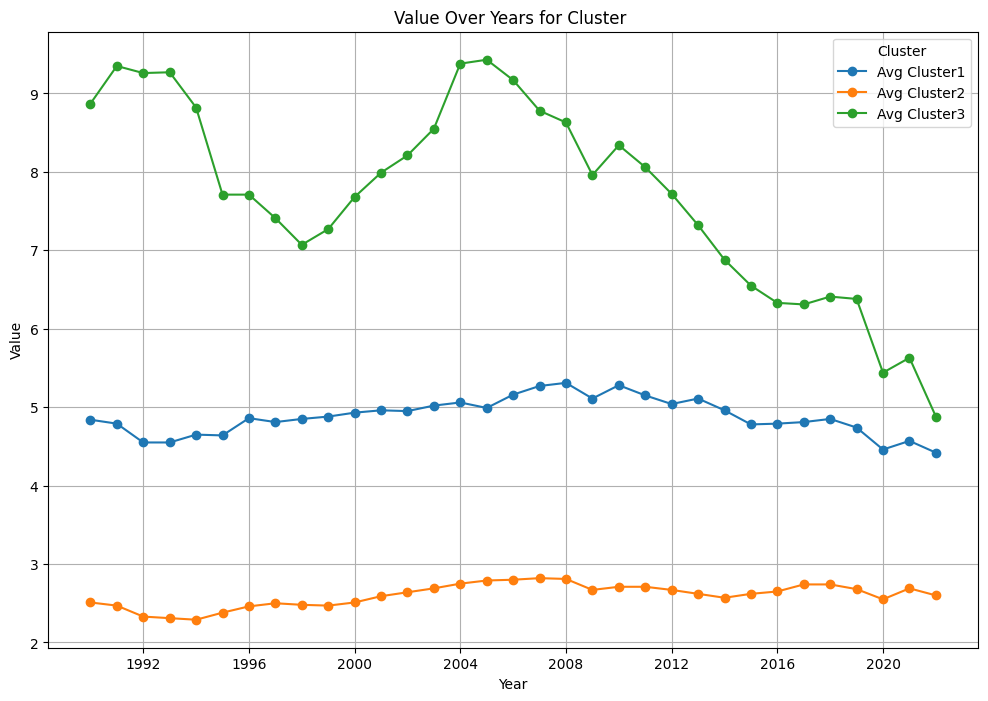

In [ ]:
# Plot data dengan grid dan membedakan berdasarkan Cluster GDP
# Buat plot untuk setiap Cluster GDP
for cluster in data.columns:  # Menggunakan kolom dari data yang merupakan Cluster GDP
    plt.plot(data.index, data[cluster], marker='o', label=cluster)  # Plot garis dengan marker


# Tambahkan judul, label, dan grid
plt.title('Value Over Years for Cluster ')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Cluster')  # Tambahkan legenda untuk Cluster GDP
plt.show()

In [ ]:
train_df = data.loc[:'2013-01-01']
test_df = data.loc['2014-01-01':]

In [ ]:
#calculate for train data
print((2022 - 1990)*0.7)
print(1990 + 23)

22.4
2013


In [ ]:
# Menghitung jumlah data pada train dan test
jumlah_train = len(train_df)
jumlah_test = len(test_df)
total_data = len(data)  # Pastikan ini adalah total dari df_pivot

# Menghitung persentase train dan test
persentase_train = (jumlah_train / total_data) * 100
persentase_test = (jumlah_test / total_data) * 100

data_summary = pd.DataFrame({
    'Keterangan': ['Jumlah data train', 'Jumlah data test', 'Total data', 'Persentase data train', 'Persentase data test'],
    'Nilai': [jumlah_train, jumlah_test, total_data, f'{persentase_train:.2f}%', f'{persentase_test:.2f}%']
})

data_summary

,Keterangan,Nilai
0,Jumlah data train,24
1,Jumlah data test,9
2,Total data,33
3,Persentase data train,72.73%
4,Persentase data test,27.27%


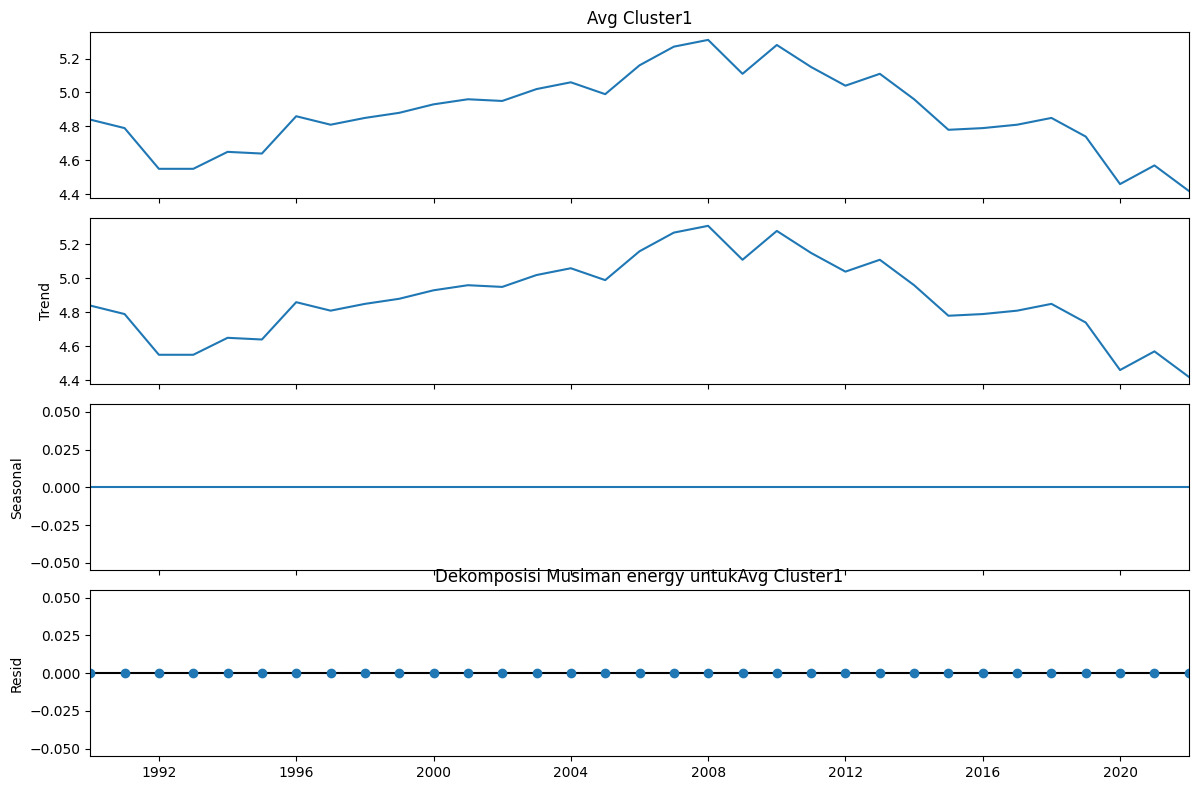

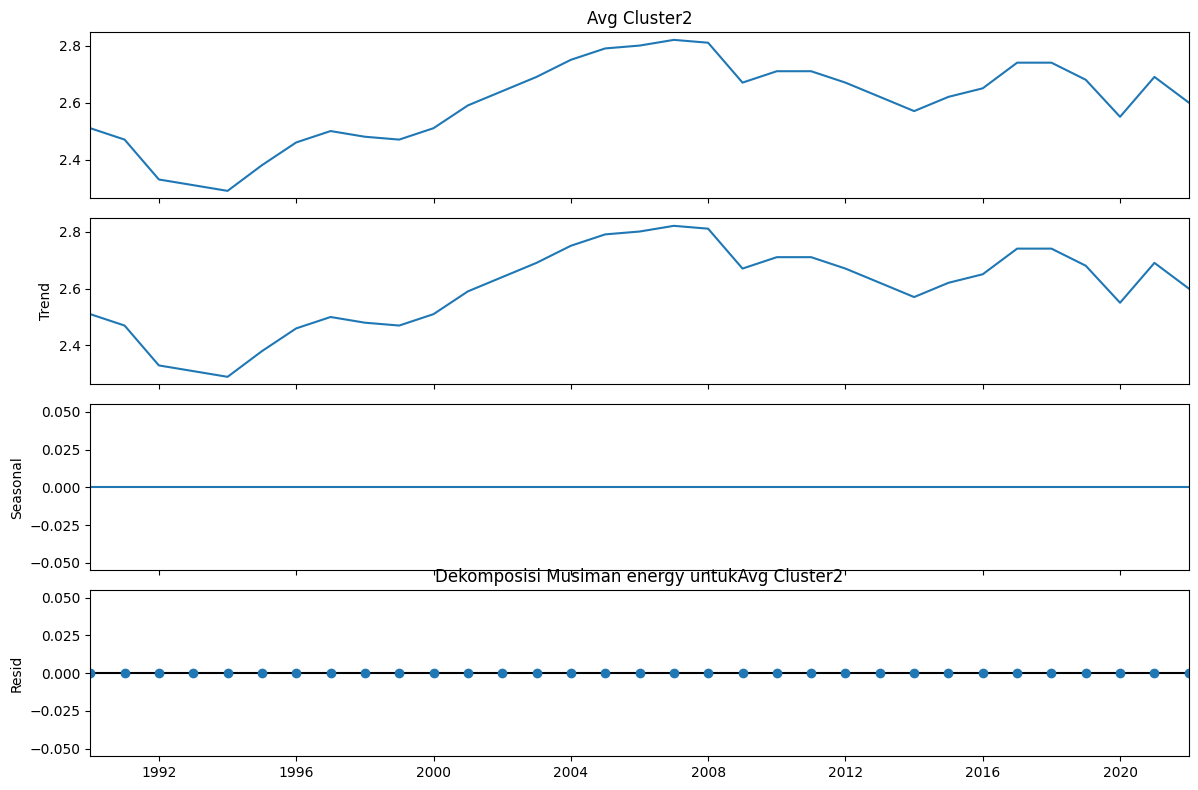

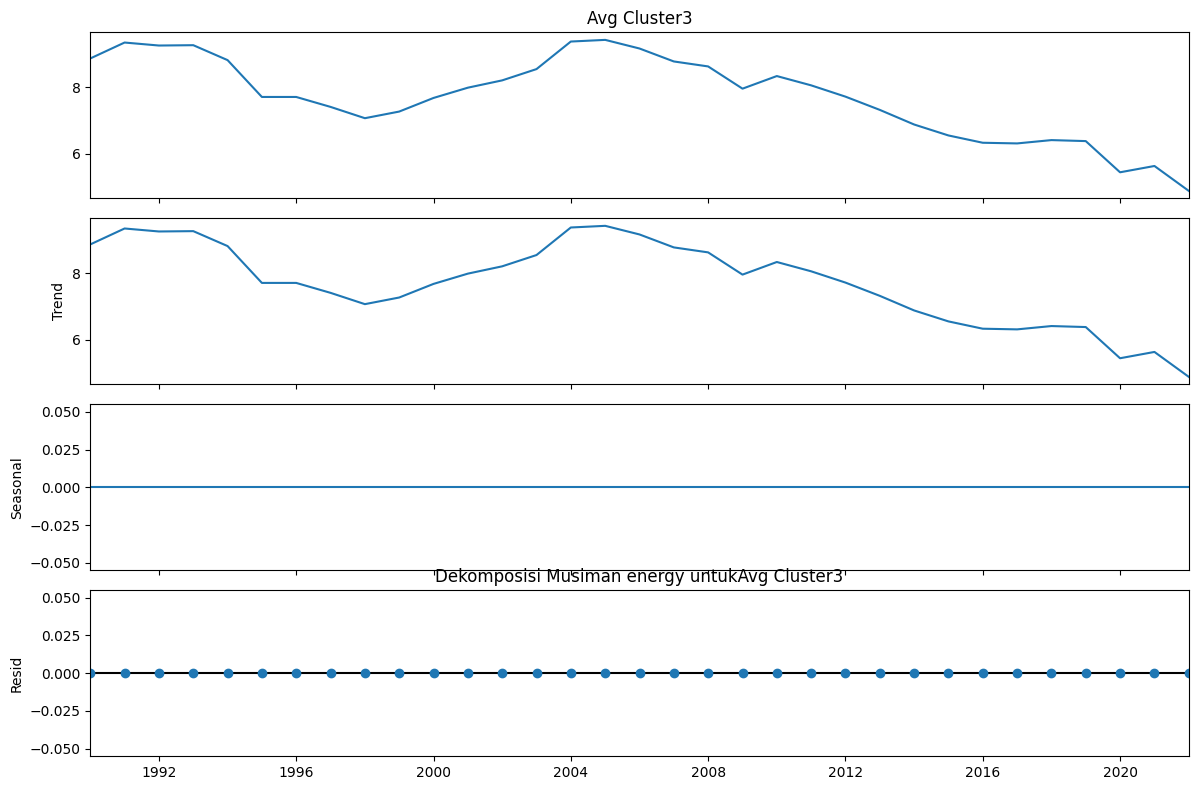

In [ ]:
# Melakukan dekomposisi musiman untuk data energy tiap cluster

for cluster in data.columns:
    decompose_add = seasonal_decompose(data[cluster], model='additive')
    # Menampilkan plot dekomposisi
    decompose_add.plot()
    plt.title('Dekomposisi Musiman energy untuk' + cluster)
    plt.show()
    print(" ")
    print(" ")

**Forcasting Using Arima Model**

In [ ]:
# Hyper parameter Tunning For Arima
# Fungsi untuk mengevaluasi model ARIMA untuk urutan tertentu (p, d, q)
def evaluate_arima_model(arima_order, df_pivot):
    # Persiapkan dataset pelatihan dan pengujian
    train_df = df_pivot.loc[:'2014-01-01']
    test_df = df_pivot.loc['2015-01-01':]
    # Buat prediksi
    model = ARIMA(train_df, order=arima_order).fit()
    model_pred = model.forecast(len(test_df))
    rmse = (mean_squared_error(test_df, model_pred)**0.5)
    return rmse

# Fungsi untuk mengevaluasi kombinasi nilai p dan q untuk model ARIMA
def evaluate_models(dataset, p_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for q in q_values:
            order = (p, 1, q)
            try:
                rmse = evaluate_arima_model(order, dataset)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
            except Exception as e:
                continue
    return best_cfg, best_score

# Daftar parameter p dan q
p_values = [0,1,2]
q_values = [0,1,2]


# Evaluasi untuk Cluster 1
best_cluster1 , score_cluster1 = evaluate_models(data['Avg Cluster1'], p_values, q_values)

# Evaluasi untuk Cluster 2
best_cluster2, score_cluster2 = evaluate_models(data['Avg Cluster2'], p_values, q_values)

# Evaluasi untuk Cluster 3
best_cluster3, score_cluster3 = evaluate_models(data['Avg Cluster3'], p_values, q_values)

# Membuat DataFrame dari hasil evaluasi
performance_df = pd.DataFrame({
    'Country': ['Cluster1', 'Cluster2','Cluster3'],
    'Best ARIMA Order': [best_cluster1 , best_cluster2 , best_cluster3],
    'Best RMSE': [score_cluster1,score_cluster2,score_cluster3 ]
})

# Menampilkan DataFrame untuk hasil evaluasi yang lebih rapi
performance_df

,Country,Best ARIMA Order,Best RMSE
0,Cluster1,"(2, 1, 2)",0.323088
1,Cluster2,"(0, 1, 0)",0.108685
2,Cluster3,"(2, 1, 1)",0.738780


In [ ]:
arima_cluster1 = ARIMA(train_df['Avg Cluster1'], order=(2, 1, 2)).fit()
arima_cluster1_train_pred = arima_cluster1.predict()
arima_cluster1_test_pred = arima_cluster1.forecast(9)

arima_cluster2 = ARIMA(train_df['Avg Cluster2'], order=(0, 1, 0)).fit()
arima_cluster2_train_pred = arima_cluster2.predict()
arima_cluster2_test_pred = arima_cluster2.forecast(9)

arima_cluster3 = ARIMA(train_df['Avg Cluster3'], order=(0, 1, 0)).fit()
arima_cluster3_train_pred = arima_cluster3.predict()
arima_cluster3_test_pred = arima_cluster3.forecast(9)

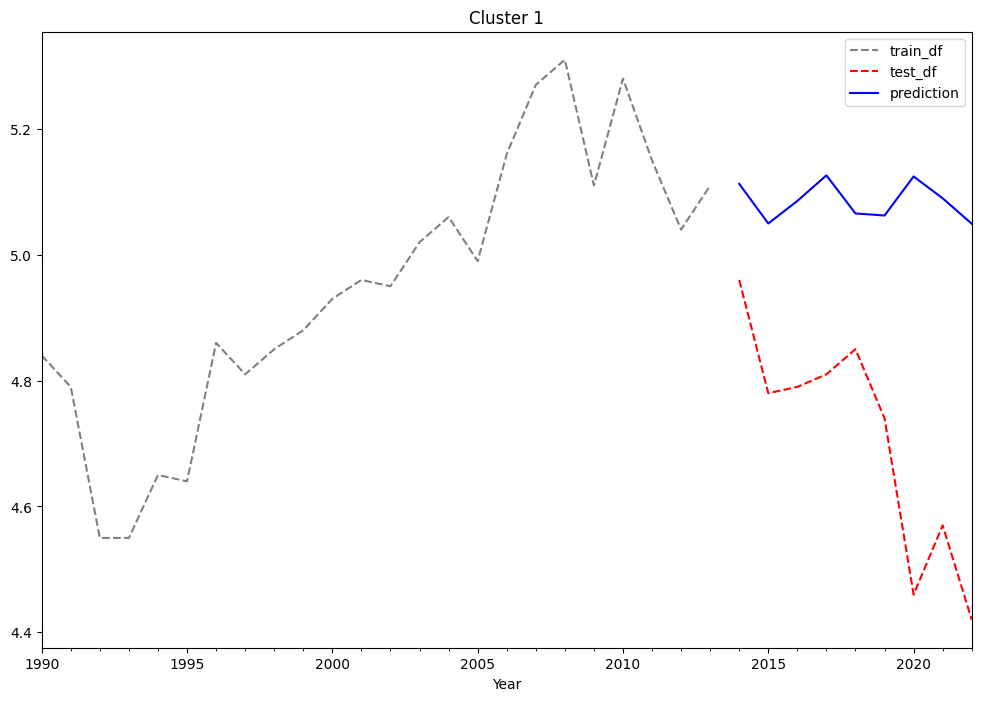

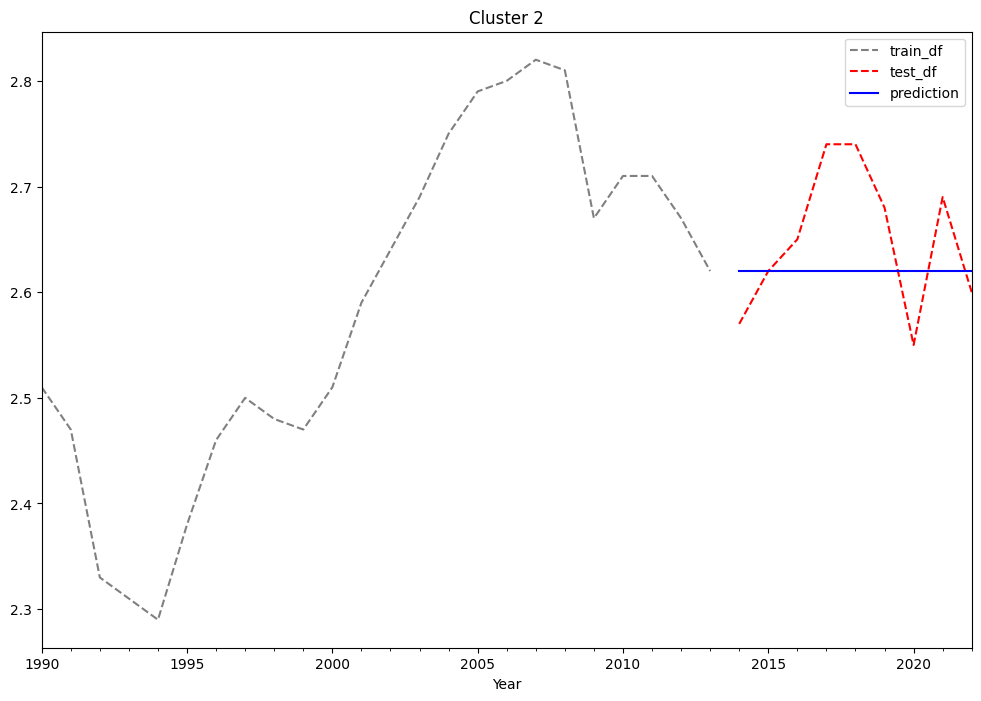

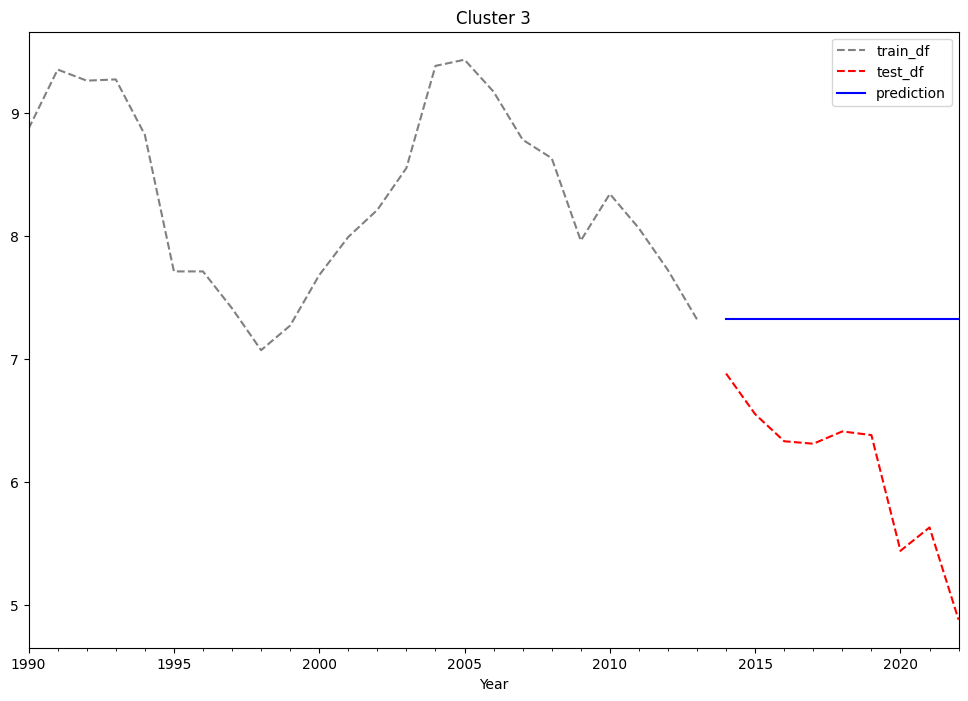

In [ ]:
# Menampilkan plot arima dari setiap baris colom

# Cluster 1
train_df['Avg Cluster1'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Avg Cluster1'].plot(style='--', color='r', legend=True, label='test_df')
arima_cluster1_test_pred.plot(color='b', legend=True, label='prediction')
plt.title('Cluster 1')
plt.show()
print("")
print("")

# Cluster 2
train_df['Avg Cluster2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Avg Cluster2'].plot(style='--', color='r', legend=True, label='test_df')
arima_cluster2_test_pred.plot(color='b', legend=True, label='prediction')
plt.title('Cluster 2')
plt.show()
print("")
print("")

# Cluster 3
train_df['Avg Cluster3'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Avg Cluster3'].plot(style='--', color='r', legend=True, label='test_df')
arima_cluster3_test_pred.plot(color='b', legend=True, label='prediction')
plt.title('Cluster 3')
plt.show()


In [ ]:
# Create test prediction to dataframe
test_predictions_df_arima = pd.DataFrame({'Avg Cluster1': arima_cluster1_test_pred, 'Avg Cluster2': arima_cluster2_test_pred, 'Avg Cluster3': arima_cluster3_test_pred})
test_predictions_df_arima

,Avg Cluster1,Avg Cluster2,Avg Cluster3
2014-01-01,5.112727,2.62,7.32
2015-01-01,5.049713,2.62,7.32
2016-01-01,5.085590,2.62,7.32
2017-01-01,5.126195,2.62,7.32
2018-01-01,5.065705,2.62,7.32
2019-01-01,5.062423,2.62,7.32
2020-01-01,5.124500,2.62,7.32
2021-01-01,5.089748,2.62,7.32
2022-01-01,5.049385,2.62,7.32


In [ ]:
results = pd.DataFrame({'Squared Error': ['MSE','MAE','RMSE']})
for column in data.columns:

    MSE = mean_squared_error(test_df[column], test_predictions_df_arima[column])
    MAE = mean_absolute_error(test_df[column], test_predictions_df_arima[column])
    RMSE = np.sqrt(mean_squared_error(test_df[column], test_predictions_df_arima[column]))
    results[column] = [MSE, MAE, RMSE]


results = results.set_index('Squared Error')
results

,Avg Cluster1,Avg Cluster2,Avg Cluster3
Squared Error,,,
MSE,0.171303,0.005111,1.871389
MAE,0.376221,0.060000,1.230000
RMSE,0.413888,0.071492,1.367987


**Forcasting Using Exponential Smoothing**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
methods = ['estimated', 'heuristic', 'legacy-heuristic']
results = {}

for column in data.columns:
  for method in methods:

    model = ExponentialSmoothing(train_df[column],
    trend='add',
    initialization_method=method,
    seasonal='add',
    seasonal_periods=12,
    damped_trend=False).fit()
    forecast = model.forecast(len(test_df['Avg Cluster1']))
    mse = mean_squared_error(test_df['Avg Cluster1'], forecast)
    results[method +" " + column] = mse

# to dataframe result
results_df = pd.DataFrame(list(results.items()), columns=['Method', 'MSE'])
results_df

,Method,MSE
0,estimated Avg Cluster1,0.245866
1,heuristic Avg Cluster1,0.391376
2,legacy-heuristic Avg Cluster1,0.183715
3,estimated Avg Cluster2,4.181476
4,heuristic Avg Cluster2,3.686768
5,legacy-heuristic Avg Cluster2,7.784972
6,estimated Avg Cluster3,8.321476
7,heuristic Avg Cluster3,10.441680
8,legacy-heuristic Avg Cluster3,10.155107


In [ ]:
fitted_model_1 = ExponentialSmoothing(train_df['Avg Cluster1'],
                                   trend = 'add',
                                   seasonal = 'add',
                                    damped_trend='legacy-heuristic',
                                   seasonal_periods = 10).fit()

In [ ]:
fitted_model_2 = ExponentialSmoothing(train_df['Avg Cluster2'],
                                   trend = 'add',
                                   seasonal = 'add',
                                    damped_trend='heuristic',
                                   seasonal_periods = 10).fit()

In [ ]:
fitted_model_3 = ExponentialSmoothing(train_df['Avg Cluster3'],
                                   trend = 'add',
                                   seasonal = 'add',
                                    damped_trend='estimated',
                                   seasonal_periods = 10).fit()

In [ ]:
test_predictions1 = fitted_model_1.forecast(len(test_df['Avg Cluster1']))
test_predictions2 = fitted_model_2.forecast(len(test_df['Avg Cluster2']))
test_predictions3 = fitted_model_3.forecast(len(test_df['Avg Cluster3']))

In [ ]:
# Create test prediction to dataframe
test_predictions_df = pd.DataFrame({'Avg Cluster1': test_predictions1, 'Avg Cluster2': test_predictions2, 'Avg Cluster3': test_predictions3})
test_predictions_df

,Avg Cluster1,Avg Cluster2,Avg Cluster3
2014-01-01,5.178265,2.609082,7.181623
2015-01-01,5.136552,2.645370,6.405001
2016-01-01,5.329951,2.663391,6.123670
2017-01-01,5.358389,2.667912,5.703667
2018-01-01,5.396906,2.628595,5.444666
2019-01-01,5.310306,2.530121,5.244534
2020-01-01,5.418624,2.547391,5.697172
2021-01-01,5.366602,2.569888,5.844185
2022-01-01,5.244777,2.531180,5.786476


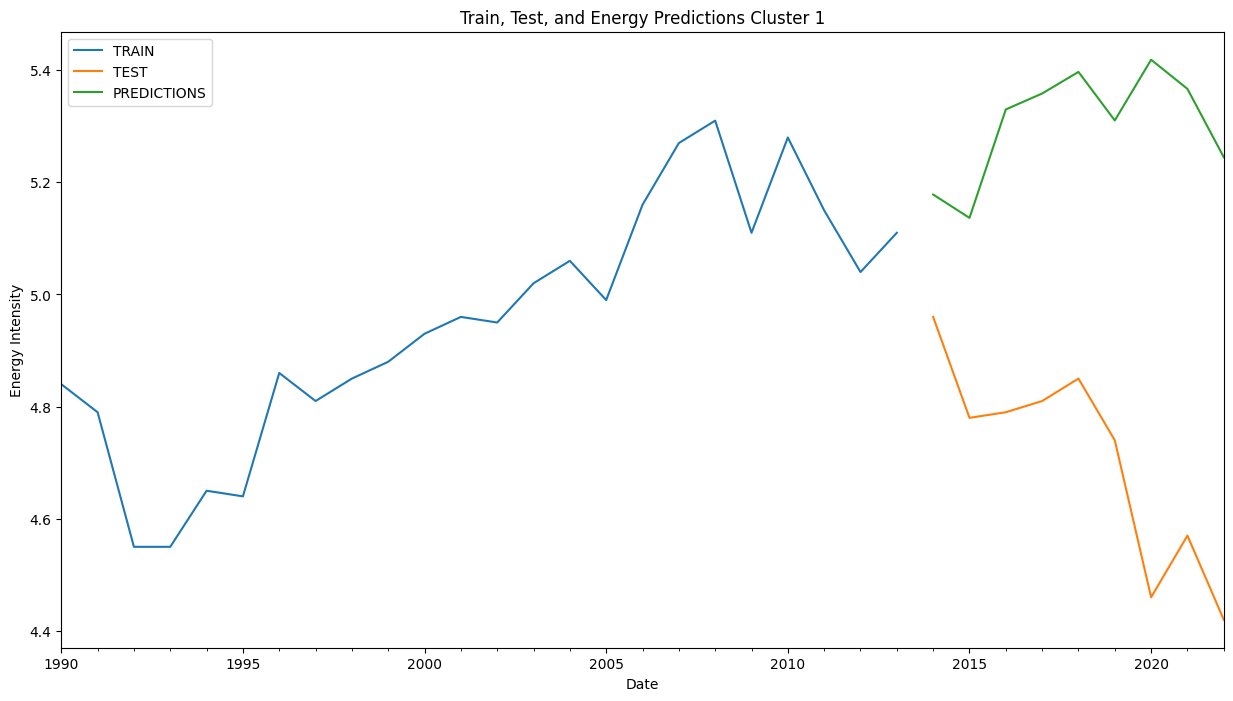

In [ ]:
train_df['Avg Cluster1'].plot(legend=True, label= 'TRAIN', figsize=(15,8))
test_df['Avg Cluster1'].plot(legend=True, label= 'TEST', figsize=(15,8))
test_predictions1.plot(legend=True, label= 'PREDICTIONS', figsize=(15,8))

plt.title('Train, Test, and Energy Predictions Cluster 1')
plt.xlabel("Date")
plt.ylabel("Energy Intensity");

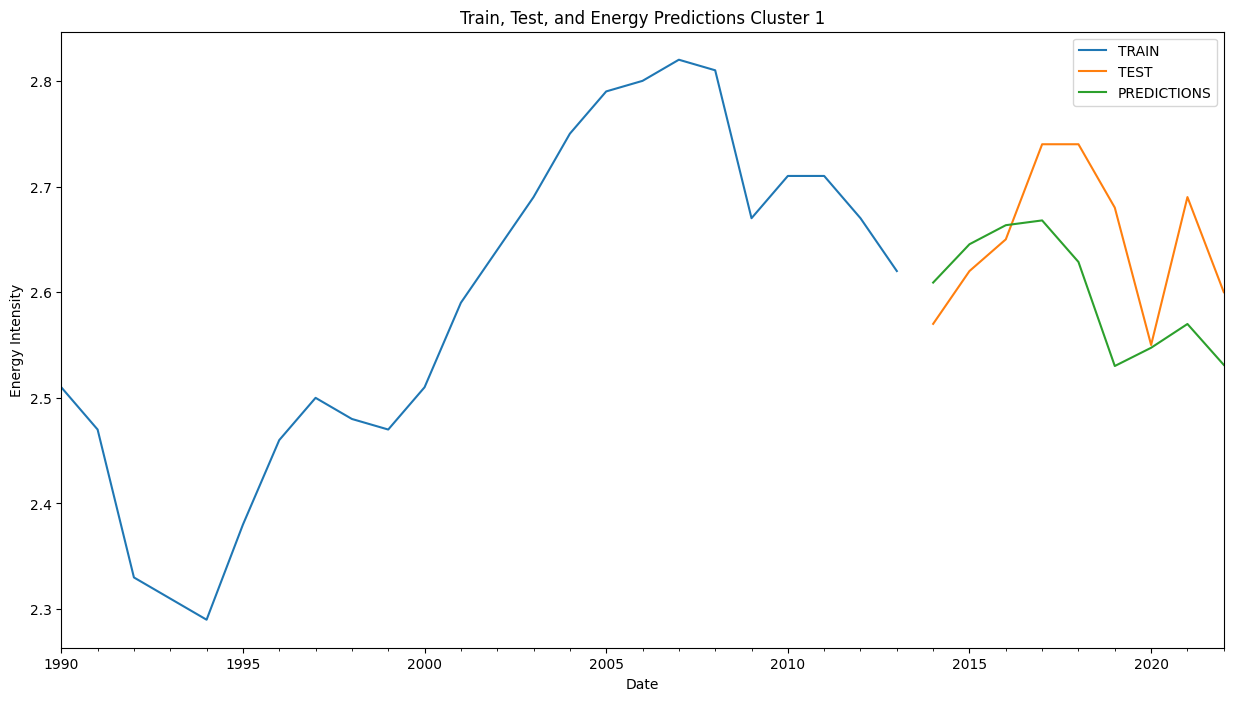

In [ ]:
train_df['Avg Cluster2'].plot(legend=True, label= 'TRAIN', figsize=(15,8))
test_df['Avg Cluster2'].plot(legend=True, label= 'TEST', figsize=(15,8))
test_predictions2.plot(legend=True, label= 'PREDICTIONS', figsize=(15,8))

plt.title('Train, Test, and Energy Predictions Cluster 1')
plt.xlabel("Date")
plt.ylabel("Energy Intensity");

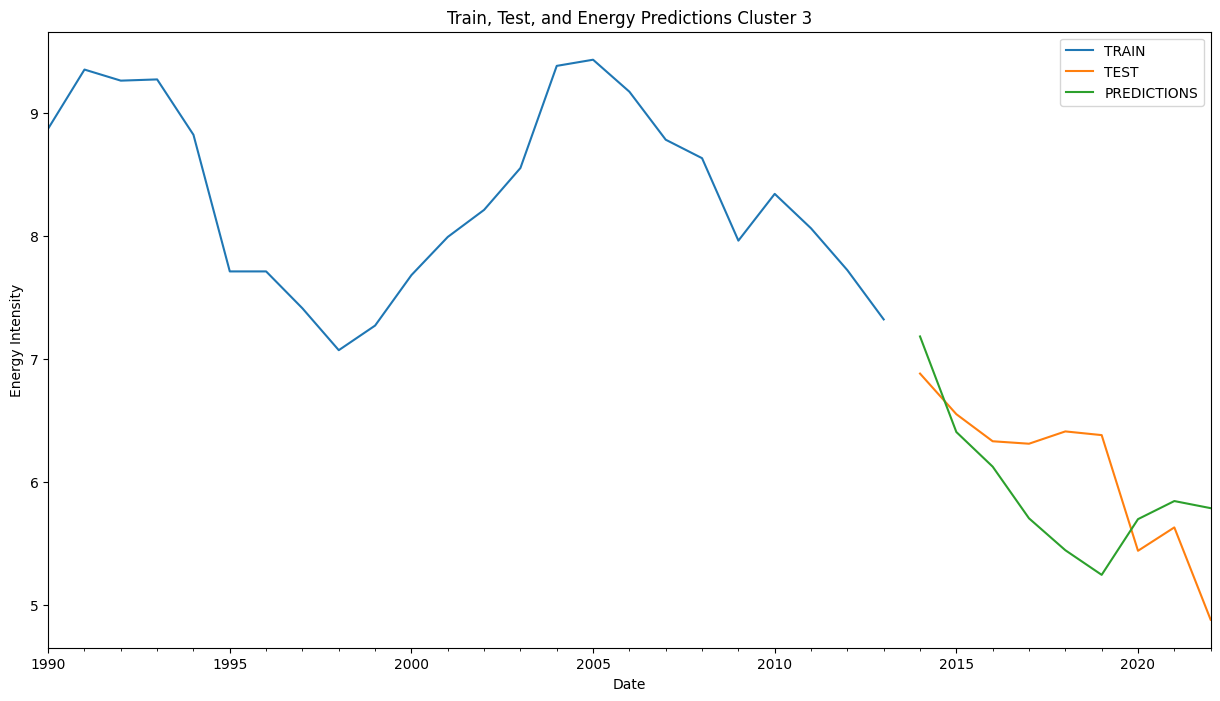

In [ ]:
train_df['Avg Cluster3'].plot(legend=True, label= 'TRAIN', figsize=(15,8))
test_df['Avg Cluster3'].plot(legend=True, label= 'TEST', figsize=(15,8))
test_predictions3.plot(legend=True, label= 'PREDICTIONS', figsize=(15,8))

plt.title('Train, Test, and Energy Predictions Cluster 3')
plt.xlabel("Date")
plt.ylabel("Energy Intensity");

In [ ]:
results = pd.DataFrame({'Squared Error': ['MSE','MAE','RMSE']})
for column in data.columns:

    MSE = mean_squared_error(test_df[column], test_predictions_df[column])
    MAE = mean_absolute_error(test_df[column], test_predictions_df[column])
    RMSE = np.sqrt(mean_squared_error(test_df[column], test_predictions_df[column]))
    results[column] = [MSE, MAE, RMSE]


results = results.set_index('Squared Error')
results

,Avg Cluster1,Avg Cluster2,Avg Cluster3
Squared Error,,,
MSE,0.402799,0.006844,0.408564
MAE,0.595597,0.066973,0.526435
RMSE,0.634665,0.082726,0.639190


**FIX MODEL FORCASTING**

In [ ]:
model_cluster1 = ExponentialSmoothing(
    data['Avg Cluster1'],
    trend='add',
    seasonal='add',
    seasonal_periods=10,
    initialization_method='legacy-heuristic',
    damped_trend=True
).fit()

model_cluster2 = ExponentialSmoothing(
    data['Avg Cluster2'],
    trend='add',
    seasonal='add',
    seasonal_periods=10,
    initialization_method='heuristic',
    damped_trend=False
).fit()

model_cluster3 = ExponentialSmoothing(
    data['Avg Cluster3'],
    trend='add',
    seasonal='add',
    seasonal_periods=10,
    initialization_method='estimated',
    damped_trend=True
).fit()


In [ ]:
# Lakukan prediksi 10 tahun ke depan untuk setiap cluster
exp_pred_cluster1 = model_cluster1.forecast(10)
exp_pred_cluster2 = model_cluster2.forecast(10)
exp_pred_cluster3 = model_cluster3.forecast(10)

In [ ]:
# Create test prediction to dataframe
predictions_df = pd.DataFrame({'Avg Cluster1': exp_pred_cluster1, 'Avg Cluster2': exp_pred_cluster2, 'Avg Cluster3': exp_pred_cluster3})
predictions_df

,Avg Cluster1,Avg Cluster2,Avg Cluster3
2023-01-01,4.420492,2.594730,4.593629
2024-01-01,4.520926,2.590164,4.345572
2025-01-01,4.511310,2.632597,3.746227
2026-01-01,4.731648,2.668781,3.523871
2027-01-01,4.681948,2.686465,3.283762
2028-01-01,4.722212,2.657399,3.197455
2029-01-01,4.752446,2.569833,3.112191
2030-01-01,4.712652,2.599016,3.161783
2031-01-01,4.662834,2.630450,3.377444
2032-01-01,4.422995,2.626884,3.204800


In [ ]:
# Create file prediciton
predictions_df.to_csv('prediction.csv')

# data all
data.to_csv('data_all_for_predic.csv')